# CNN
B.R. Kavitha, C. Srimathi,
"Benchmarking on offline Handwritten Tamil Character Recognition using convolutional neural networks",
*Journal of King Saud University - Computer and Information Sciences*,
2019, 
ISSN 1319-1578,
[DOI: 10.1016/j.jksuci.2019.06.004.](https://doi.org/10.1016/j.jksuci.2019.06.004)


## Import Modules

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
#from google.colab import drive
import random
import string
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [ ]:
drive.mount('/content/drive')

## Load the dataset

In [ ]:
base_dir = 'fourtyclasses'
img_height = 64
img_width = 64

img_label = '53'
file_name='1062_1.jpg'
img_file = tf.io.read_file(os.path.join(base_dir,img_label,file_name))

In [ ]:
# You can use tensorflow libraries instead
file_list = []
img_per_class = 2000
for directory,sub_dir,file_names in os.walk(base_dir):
    if sub_dir != []:
        class_names = sub_dir
        continue
    i=0
    for file in file_names:
        if i<img_per_class and (file.endswith('.jpg') or file.endswith('.JPG')):
            file_list.append(os.path.join(directory,file))
            i+=1
    if i!=0:
        print(f"{i} Images from : {directory}")

random.Random(45).shuffle(file_list)

2000 Images from : fourtyclasses/47
2000 Images from : fourtyclasses/30
2000 Images from : fourtyclasses/46
2000 Images from : fourtyclasses/29
2000 Images from : fourtyclasses/45
2000 Images from : fourtyclasses/64
2000 Images from : fourtyclasses/26
2000 Images from : fourtyclasses/60
2000 Images from : fourtyclasses/56
2000 Images from : fourtyclasses/43
2000 Images from : fourtyclasses/40
2000 Images from : fourtyclasses/31
2000 Images from : fourtyclasses/49
2000 Images from : fourtyclasses/55
2000 Images from : fourtyclasses/38
2000 Images from : fourtyclasses/39
2000 Images from : fourtyclasses/33
2000 Images from : fourtyclasses/1
2000 Images from : fourtyclasses/70
2000 Images from : fourtyclasses/35
2000 Images from : fourtyclasses/37
2000 Images from : fourtyclasses/53
2000 Images from : fourtyclasses/27
2000 Images from : fourtyclasses/52
2000 Images from : fourtyclasses/24
2000 Images from : fourtyclasses/61
2000 Images from : fourtyclasses/36
2000 Images from : fourtyclas

In [ ]:
image_count = len(file_list)
print(f'Number of images : {image_count}')
print('\n'.join(file_list[:10]))
print(len(class_names))

In [ ]:
# Save the file list if required
#pickle.dump(file_list,open('./pkl_data/20210608.pkl','wb'))

In [ ]:
#file_list = pickle.load(open('./pkl_data/20210608.pkl','rb'))

image_count = len(file_list)
print(f'Number of images : {image_count}')
print('\n'.join(file_list[:10]))
print(f"Number of classes: {len(class_names)}\n\
Classes: {class_names}")

In [ ]:
print('\n'.join(file_list[:5]))

fourtyclasses/29/MD2696.JPG
fourtyclasses/43/1223_3.jpg
fourtyclasses/38/MD145.jpg
fourtyclasses/57/8337.jpg
fourtyclasses/60/17871_3.jpg


In [ ]:
#load the file list
#dataset = tf.data.Dataset.list_files(str(base_dir+'/*/*'),shuffle=False) #This can be used instead of the for loop above

# Create a data set from the file_list loaded
dataset = tf.data.Dataset.from_tensor_slices(file_list)

#shuffle the data
# The file list already doing the shuffle.
#dataset = dataset.shuffle(image_count, reshuffle_each_iteration=False)

for f in dataset.take(10):
    print(f.numpy())

#Print the class names
#class_names = np.array(sorted[item.name for item in data])

b'fourtyclasses/29/MD2696.JPG'
b'fourtyclasses/43/1223_3.jpg'
b'fourtyclasses/38/MD145.jpg'
b'fourtyclasses/57/8337.jpg'
b'fourtyclasses/60/17871_3.jpg'
b'fourtyclasses/43/193_25_5.jpg'
b'fourtyclasses/51/5172_1.jpg'
b'fourtyclasses/42/185_24_5.jpg'
b'fourtyclasses/27/7612_1.jpg'
b'fourtyclasses/57/fgikglol_4.jpg'


In [ ]:
val_size = int(image_count * 0.2)
print(tf.data.experimental.cardinality(dataset).numpy())

90000


In [ ]:
def get_label (file_name):
    parts = tf.strings.split(file_name,os.path.sep)
    one_hot = parts[-2] == class_names
    return tf.argmax(one_hot)

def decode_image(img_file,image_type=None,resize_shape=None, channels=0):
    if image_type == 'jpeg' or image_type == 'jpg':
        img_decoded = tf.image.decode_jpeg(img_file,channels=channels)
    elif image_type == 'png':
        img_decoded = tf.image.decode_png(img_file,channels=channels)
    else:
        img_decoded = tf.image.decode_image(img_file,channels=channels)
    
    if (image_type in ['jpeg','jpg', 'png']) and resize_shape != None:
        img_decoded = tf.image.resize(img_decoded,resize_shape,method='lanczos3')
    img_decoded = tf.image.rgb_to_grayscale(img_decoded)
    return img_decoded

def process_path(file_name):
    label = get_label(file_name)
    
    #Load the raw data
    img = tf.io.read_file(file_name)
    img = decode_image(img,'jpeg',resize_shape=(img_width,img_height),channels=3)
    
    return img,label

In [ ]:
dataset_img = dataset.map(process_path)

In [ ]:
val_size = int(image_count * 0.2)
train_ds_img = dataset_img.skip(val_size)
test_ds_img  = dataset_img.take(val_size)

print(tf.data.experimental.cardinality(train_ds_img).numpy())
print(tf.data.experimental.cardinality(test_ds_img).numpy())

72000
18000


In [ ]:
batch_size = 64

train_batchs = train_ds_img.batch(batch_size)
test_batchs = test_ds_img.batch(batch_size)
print (f"Number of Training batchs: {tf.data.experimental.cardinality(train_batchs).numpy()}")
print (f"Number of Testing batchs: {tf.data.experimental.cardinality(test_batchs).numpy()}")

#for x,y in train_batchs.take(5):
#    print(y.numpy())'''

Number of Training batchs: 1125
Number of Testing batchs: 282


In [ ]:
num_classes = len(class_names)
  
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),#,input_shape=(img_height, img_width, 1)),
  layers.Dropout(0.1,seed=4),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2,seed=9),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.3,seed=12),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.4,seed=34),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dropout(0.5,seed=1),
  layers.Dense(200, activation='relu'),
  layers.Dense(num_classes,)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
#!mkdir pickles/checkpoint20200620
checkpoint_filepath = './pickles/checkpoint20200620/checkpoint.chk'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='auto',
    save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [ ]:
epochs=100
history = model.fit(
  train_batchs,
  epochs=epochs,
  callbacks = [model_checkpoint_callback,early_stopping],
  validation_data=test_batchs,
  )


In [ ]:
loss_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
loss_values = history.history['val_accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
name = 'model7'
historyfile = name+"_history.pkl"
model.save(str('pickles/'+name+'.h5'),save_format='h5')
pickle.dump(history.history,open('pickles/'+historyfile, 'wb'))

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Loading the character encodings

In [ ]:
encoding_file = '../charecter_folder_encoding.pkl'

In [ ]:
character_dict = pickle.load(open(encoding_file,'rb'))

In [ ]:
class_char = [ character_dict[int(x)].decode('utf-8') for x in class_names ]

In [ ]:
print(class_char)

['പ', 'ങ', 'ന', 'ന്ധ', 'ധ', 'റ', 'ർ', 'സ', 'വ', 'ഥ', 'ഢ', 'ച', 'ഫ', 'ല', 'ഠ', 'ഡ', 'ജ', 'അ', 'ഋ', 'ഞ', 'ആ', 'യ', 'ൾ', 'മ', 'ഘ', 'ഹ', 'ട', 'ള', 'ര', 'ബ', 'ത', 'ശ', 'ഴ', 'ഛ', 'ണ', 'ൺ', 'ഇ', 'ൻ', 'ൽ', 'ഭ', 'ഷ', 'ദ', 'ഗ', 'ഉ', 'ഖ']


## Loading saved model

In [ ]:
model = Sequential()
name = 'model7'
model = keras.models.load_model(str('pickles/'+name+'.h5'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

### Run Evaluation on the model
This ensures that weights were saved as well

In [ ]:
evaluation_train=model.evaluate(train_batchs,return_dict=True)

720/720 [==============================] - 777s 993ms/step - loss: 0.0357 - accuracy: 0.9926


In [ ]:
evaluation_test=model.evaluate(test_batchs,return_dict=True)

180/180 [==============================] - 148s 812ms/step - loss: 0.0629 - accuracy: 0.9849


In [ ]:
dot_img_file = './plot.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

### Do the predictions

In [ ]:
y_predict = model.predict(test_batchs)

In [ ]:
print(type(y_predict))
print(test_ds_img)

<class 'numpy.ndarray'>
<TakeDataset shapes: ((64, 64, 1), ()), types: (tf.float32, tf.int64)>


In [ ]:
Y_test = []
y_act_predict = np.argmax(y_predict,axis=1)
print(y_act_predict.shape)
for img,label in test_ds_img.as_numpy_iterator():
    Y_test.append(label)
Y_test = np.array(Y_test)
print(Y_test.shape)

(18000,)
(18000,)


#### Create the classification report and Confusion matrix

In [ ]:
print(classification_report(Y_test,y_act_predict,))
con_mat = confusion_matrix(Y_test,y_act_predict)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       409
           1       0.99      1.00      0.99       433
           2       0.98      1.00      0.99       402
           3       1.00      0.99      0.99       411
           4       0.98      0.99      0.98       415
           5       1.00      1.00      1.00       410
           6       0.98      0.99      0.98       379
           7       0.98      0.99      0.98       369
           8       0.95      0.98      0.97       388
           9       0.98      1.00      0.99       405
          10       0.99      0.97      0.98       410
          11       0.99      0.99      0.99       402
          12       0.98      0.99      0.99       413
          13       1.00      0.99      0.99       398
          14       0.99      1.00      0.99       392
          15       0.95      0.98      0.96       390
          16       1.00      0.99      0.99       412
          17       0.99    

/home/shared/Files/Programing/Python/Jupyter Notebooks/OCR Malayalam/Classifiers/DeepLearning/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['47', '30', '46', '29', '45', '64', '26', '60', '56', '43', '40', '31', '49', '55', '38', '39', '33', '1', '70', '35', '37', '53', '27', '52', '24', '61', '36', '62', '54', '50', '42', '57', '63', '32', '41', '28', '48', '23', '25', '51', '58', '44', '13', '59', '2'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


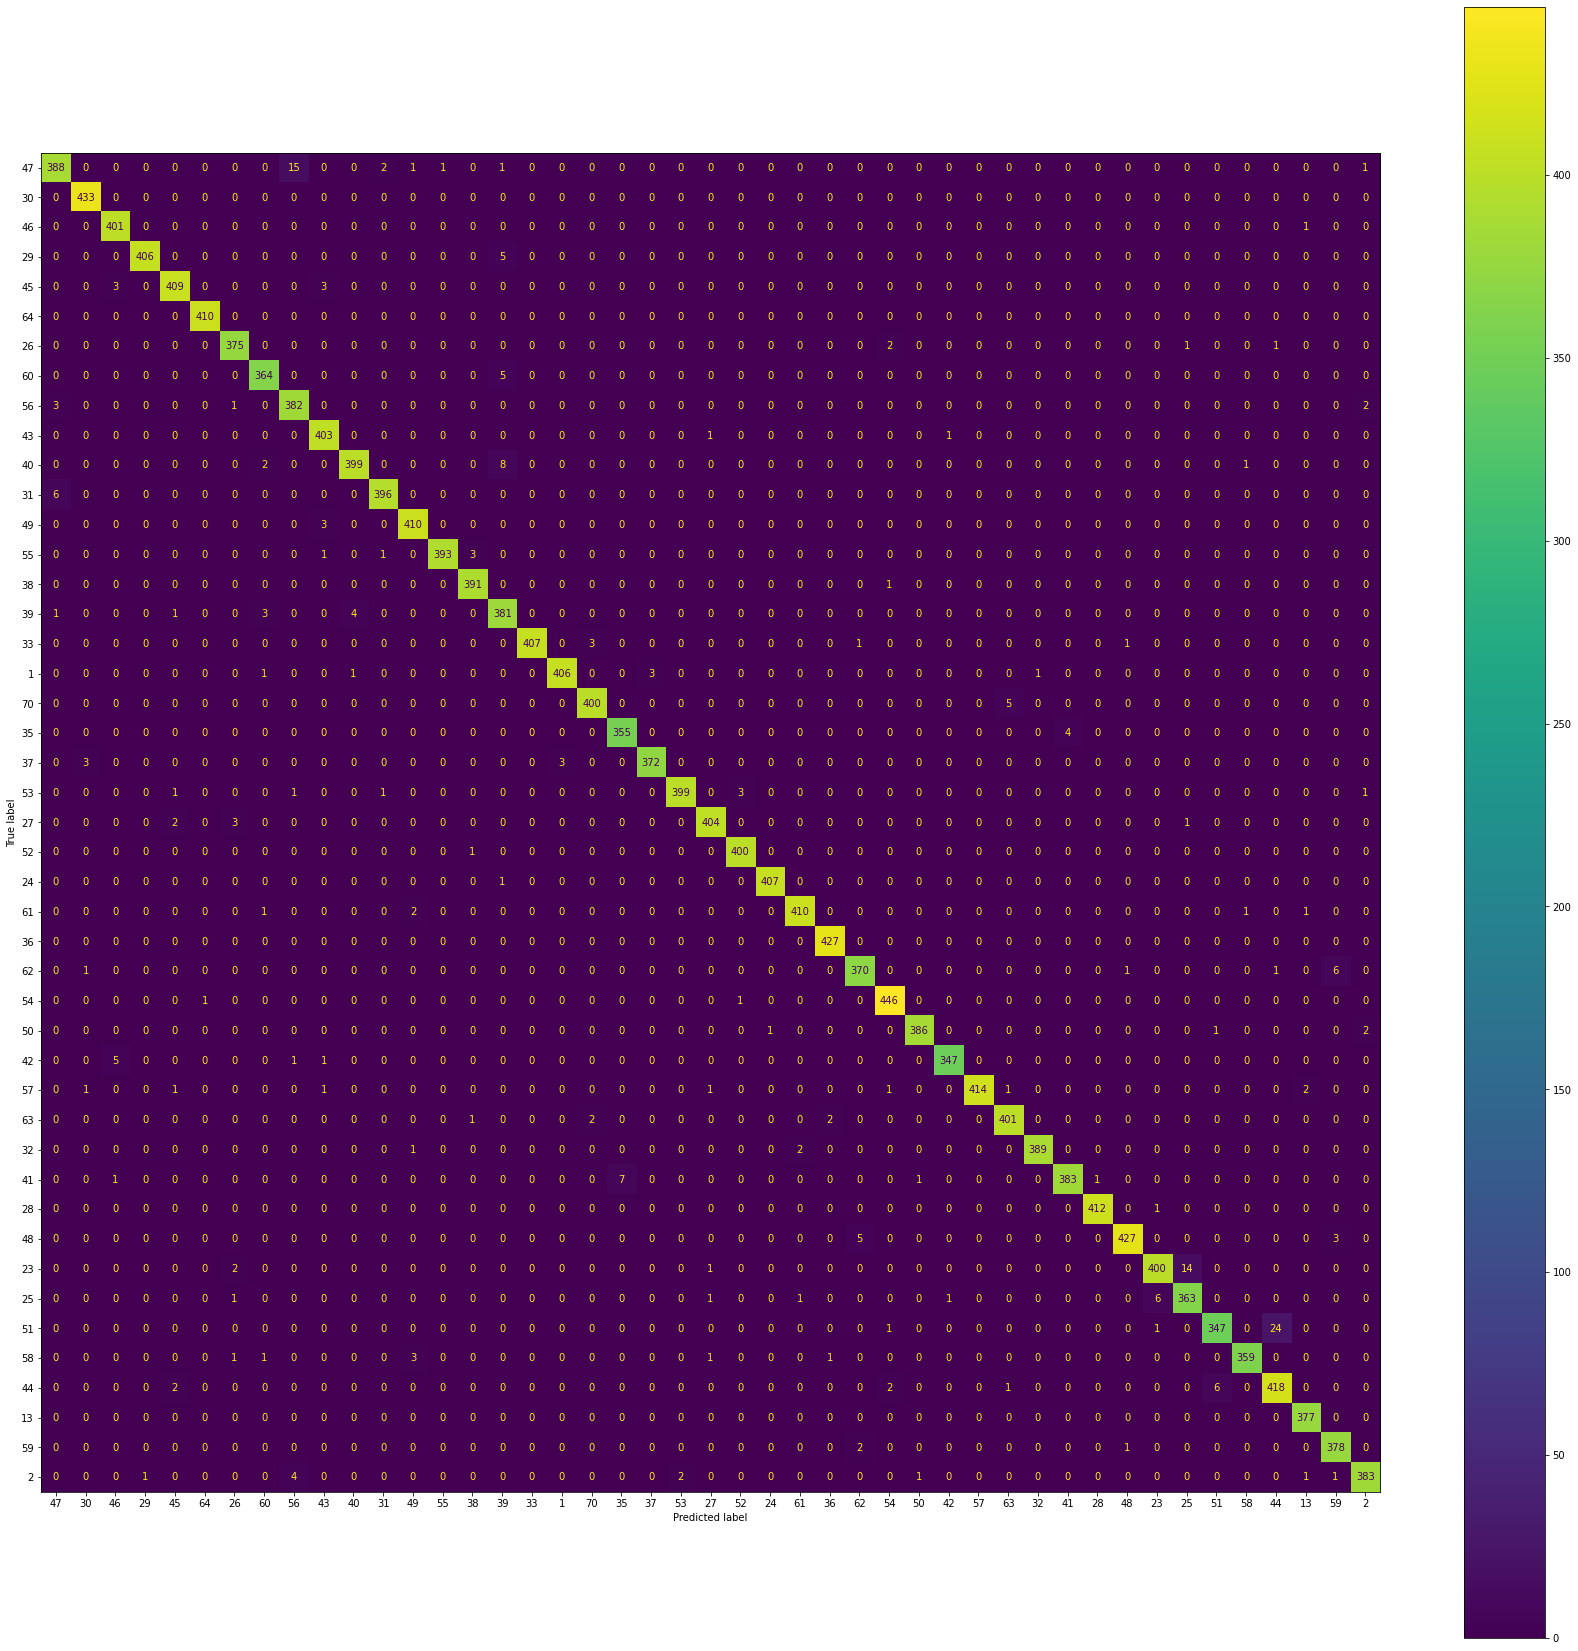

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
ConfusionMatrixDisplay(con_mat,class_names).plot(ax=ax,values_format = 'd')

## Predictions on a single image 

In [ ]:
img_pos = random.randint(0,len(file_list))
img_file = file_list[img_pos]
img_label = img_file.split('/')[-2]
img_label = character_dict[int(img_label)]
img = process_path(img_file)

Image Label: ഖ


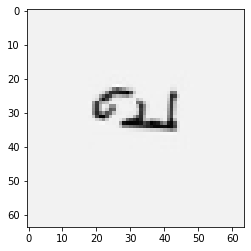

In [ ]:
print(f"Image Label: {img_label.decode('utf-8')}")
plt.imshow(img[0].numpy().reshape((64,64)),"gray")

In [ ]:
num_of_test = 1

test_image = tf.data.Dataset.from_tensor_slices([img_file])
test_image = test_image.map(process_path)
test_image = test_image.batch(num_of_test)

prediction = model.predict(test_image)
predicted_name = str(class_names[np.argmax(prediction, axis=1)[0]])
predicted_name = character_dict[int(predicted_name)]

if predicted_name == img_label:
    print(f"Correctly predicted: {predicted_name.decode('utf-8')}")
else:
    print(f"Incorrect prediction: predicted_value: {predicted_name.decode('utf-8')},\
    True value: {img_label.decode('utf-8')}")
    print(f"file_name: {img_file.decode('utf-8')}")


Correctly predicted: ഖ


## Grad-Cam
The code for grad-cam is refered from the Keras Documentation
[here](https://keras.io/examples/vision/grad_cam/)

In [ ]:
import numpy as np

# Display
from IPython.display import Image, display
import matplotlib.cm as cm
import cv2

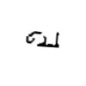

fourtyclasses/2/2047_4.jpg


In [ ]:
last_conv_layer_name = "conv2d_7"

dims = (64,64)
img_path = img_file

display(Image(img_file))
print(img_file)

In [ ]:
def get_img_array(img_path, size):
    # `img` is a image of size 299x299
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    img = cv2.resize(img,size)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    img = np.expand_dims(img, axis=2)
    img = np.expand_dims(img, axis=0)
    img = img*1.0
    return img
arr = get_img_array(img_file,dims)
print(arr.shape)

(1, 64, 64, 1)


In [ ]:
def make_gradcam_heatmap(img_array, model_orig, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    model = keras.models.clone_model(model_orig)
    
    model.layers[-1].activation = None
    #model = layers[1:]
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    #print(grad_model.summary())
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
            print(pred_index)
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    #print(last_conv_layer_output)
    grads = tape.gradient(class_channel, last_conv_layer_output)
    #print(grads)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

tf.Tensor(33, shape=(), dtype=int64)


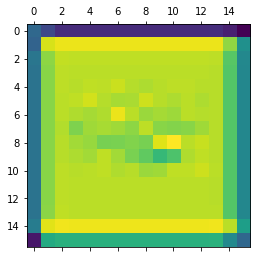

In [ ]:
last_conv_layer_name = "conv2d_3" # this name is from the model summay, select the convolution layer whose gradients you want to see
preds = model.predict(arr)
#print("Predicted:", decode_predictions(preds, top=1)[0])
heatmap = make_gradcam_heatmap(arr, model, last_conv_layer_name)
plt.matshow(heatmap)
plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path=None, alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    if cam_path == None:
            cam_path ='/tmp/img.jpg'
    superimposed_img.save(cam_path)

    # Display Grad CAM
    #display(Image(cam_path))
    return superimposed_img

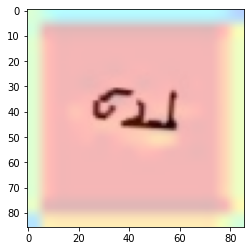

In [ ]:
plt.imshow(save_and_display_gradcam(img_file,heatmap))